In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import metadata

In [3]:
df = pd.read_csv('genome_metadata.tsv', sep='\t')
df

,genome_id,metagenome_id,genome_length,num_contigs,n50,num_16s,num_5s,num_23s,num_trna,completeness,contamination,quality_score,mimag_quality,otu_id,ecosystem,ecosystem_category,ecosystem_type,habitat,longitude,latitude
0,3300025516_6,3300025516,2910752,137,34707,1.0,1.0,1.0,43.0,90.42,0.65,87.17,HQ,OTU-1761,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Terrestrial,Deep subsurface,Serpentinite rock and fluid,-122.439,38.8740
1,3300025516_8,3300025516,2473071,426,6047,1.0,0.0,0.0,37.0,65.97,2.52,53.37,MQ,OTU-11015,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Terrestrial,Deep subsurface,Serpentinite rock and fluid,-122.439,38.8740
2,3300025516_7,3300025516,2626327,104,45304,1.0,1.0,0.0,48.0,94.49,1.13,88.84,MQ,OTU-1762,d__Bacteria;p__Firmicutes_D;c__UBA994;o__UBA99...,Terrestrial,Deep subsurface,Serpentinite rock and fluid,-122.439,38.8740
3,3300025516_3,3300025516,3300395,411,9060,0.0,0.0,0.0,31.0,79.36,4.74,55.66,MQ,OTU-8708,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Terrestrial,Deep subsurface,Serpentinite rock and fluid,-122.439,38.8740
4,3300025516_1,3300025516,4906168,289,24717,1.0,1.0,1.0,47.0,94.19,3.23,78.04,HQ,OTU-17789,d__Bacteria;p__Desulfobacterota;c__BSN033;o__B...,Terrestrial,Deep subsurface,Serpentinite rock and fluid,-122.439,38.8740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52510,3300011790_6,3300011790,3029749,36,175264,0.0,1.0,0.0,33.0,100.00,0.98,95.10,MQ,OTU-7683,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Built environment,City,city subway metal,-73.940,40.7000
52511,3300011790_3,3300011790,4459934,213,30946,1.0,1.0,1.0,43.0,91.98,1.98,82.08,HQ,OTU-4250,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Built environment,City,city subway metal,-73.940,40.7000
52512,3300011790_1,3300011790,5620259,100,112541,1.0,2.0,0.0,39.0,97.21,0.51,94.66,MQ,OTU-5597,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Built environment,City,city subway metal,-73.940,40.7000
52513,2032320008_1,2032320008,4057924,411,12782,0.0,0.0,0.0,24.0,54.08,0.00,54.08,MQ,OTU-12351,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Arthropoda,Symbiotic fungal gardens and galleries,Dendroctonus ponderosae fungus gallery,-119.664,54.7192


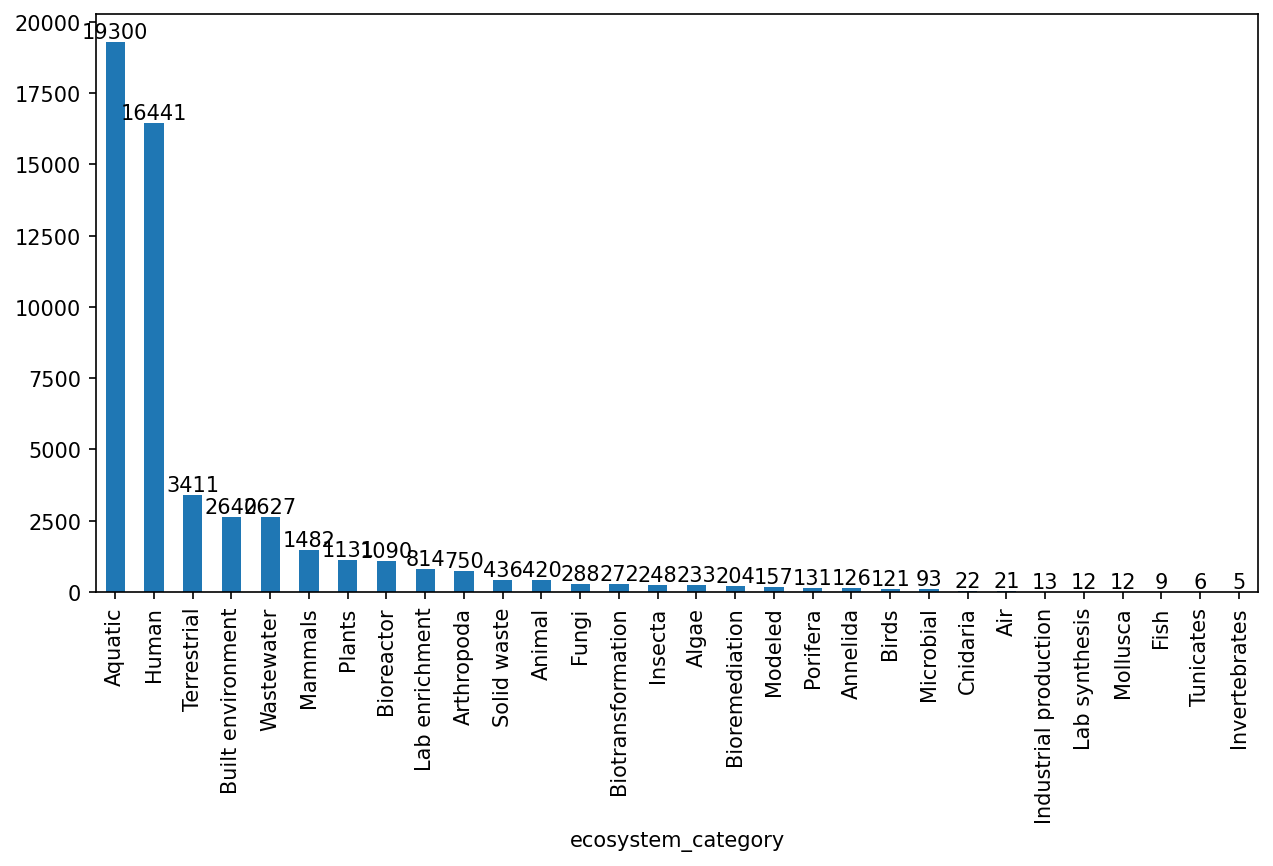

In [11]:
plt.figure(figsize=(10, 5), dpi=150)
ax = df['ecosystem_category'].value_counts().plot(kind='bar')
for i, v in enumerate(df['ecosystem_category'].value_counts()):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

### Separate dataframes by categories

In [34]:
human_digestive = df[df['ecosystem_category'] == 'Human']
human_digestive = human_digestive[human_digestive['ecosystem_type'] == 'Digestive system']
all_human_digestive_habitats = np.unique(human_digestive['habitat'].values)
print('Habitats of human digestive system samples:')
for h in all_human_digestive_habitats:
    print('-', h, human_digestive[human_digestive['habitat'] == h].shape[0])

Habitats of human digestive system samples:
- Fossilized dental plaque 10
- Host-associated 1109
- Huma fecal 10
- Human 5743
- Human bile duct 4
- Human colon tissue 8
- Human fecal 4749
- Human feces 2320
- Human gut 54
- Human host-associated 1363
- Human oral 496
- Premature human infant gut 3
